In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm
from matplotlib.ticker import LinearLocator, PercentFormatter

%config InlineBackend.figure_formats = ['svg']

# Topic 1: Introduction to Monte-Carlo simulation

## Example 1.1. Estimation of Pi

In [2]:
def pi_estimation(N0: int):
    '''
        Estimation of Pi, using Hit or Miss method. The idea is to sample a large number N0 points
        into a quadrant of square. The ratio of the number of points fell into the area specified by
        y**2 + x**2 = 1, say, N_circ and N0, i.e. N_circ/N0*4 is the Pi number
    '''
    x = np.random.uniform(0, 1, N0)
    y = np.random.uniform(0, 1, N0)
    n = 0
    for i in range(N0):
        if (x[i]**2+y[i]**2) < 1:
            n += 1
    pi_estimated = n/N0*4
    
    return pi_estimated

In [3]:
number_of_sample = 500
number_of_sampling = 100000
pi_array = []
for i in range(number_of_sample):
    pi_array.append(pi_estimation(number_of_sampling))

pi_array = np.array(pi_array)
mean_pi = np.mean(pi_array)
mean_pi_square = np.mean(pi_array**2)
std_pi = np.sqrt((mean_pi_square-mean_pi**2)/(number_of_sample-1))

mean_pi, std_pi

(3.1414867200000005, 0.00022774960601168895)

## Problem 1.1

$^{222}_{86}Rn$ decays into $^{218}_{84}Po$ with period of 3.8 days. Let us assume initially there was $10^4$ Rn nuclei.

1. Write a Monte-Carlo simulation describing $N_{Rn}(t)$ in 15 days.
2. Write a program to calculate the number of Rn decays in a single day. Prove that this number obeys Poisson distribution with $10^5$ trials.

In [4]:
def MonteCarlo_decay(N0: int, T: float, mul_T: int):
    p = np.log(2)/T
    max_time = mul_T*T
    N = [True for i in range(N0)]
    time = np.arange(1, max_time, 1)
    n = []
    for t in time:
        r = np.random.uniform(0, 1, N0)
        N = N&(r>p)
        n.append(sum(N))
        
    return time, n

def decay_function(N0: int, T: float, t: float):
    p = np.log(2)/T
    
    return N0*np.exp(-p*t)

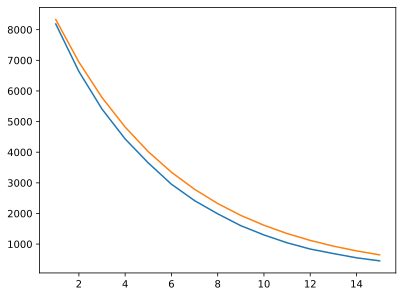

In [5]:
time, n = MonteCarlo_decay(10000, 3.8, 4)
plt.plot(time, n)
plt.plot(time, [decay_function(10000, 3.8, t) for t in time])

Poisson distribution, in case you forget,

\begin{align}
\rho(k, \mu) = \dfrac{e^{-\mu}\mu^k}{k!}
\end{align}

Let us suppose at $t_0$ we have $2\times 10^4$ particles. The probability of 1 particle to decay after $\Delta t$ is $\lambda=0.0015$. 

In [6]:
N_0 = 20000
p = 0.0015
mu = p*N_0
M = 100000

delta_N = []
for k in range(M):
    r = np.random.uniform(0, 1, N_0)
    r = (r <= p)
    delta_N.append(sum(r))

k_range = np.arange(min(delta_N), max(delta_N), 1)

In [7]:
def poisson_distribution(mu, k):
    rho = (np.exp(-mu)*mu**k)/np.math.factorial(k)
    return rho

rhos = [poisson_distribution(mu, k) for k in k_range]

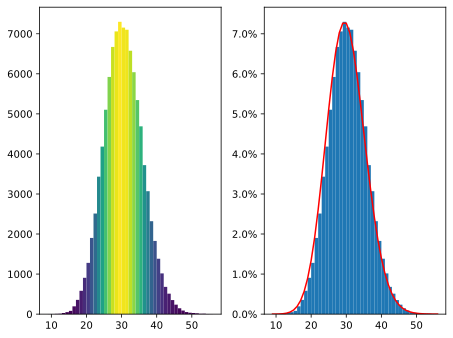

In [8]:
# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(delta_N, bins=k_range)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(delta_N, bins=k_range, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))
axs[1].plot(k_range, rhos, c='red')

## Problem 1.2. Integral using numerical methods

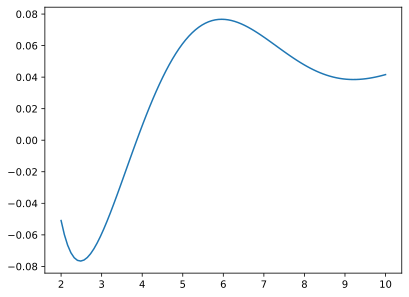

In [11]:
def f(x):
    return (np.cos(x)/np.sqrt(1+x**4))+0.05

xrange = np.linspace(2, 10, 100)
yrange = [f(x) for x in xrange]

plt.plot(xrange, yrange)

In [27]:
def MCintegral1D(style: str, N: int, xmin, xmax, ymax):
    '''
    Args:
    
    Return:
    
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    
    if style == 'HM':
        yrand = np.random.uniform(0, ymax, N)
        hit_pos, hit_both = 0, 0
        for n in range(N):
            if 0 < yrand[n] < f(xrand[n]):
                hit_pos += 1
            if 0 < yrand[n] < np.abs(f(xrand[n])):
                hit_both += 1
        int_positive = (hit_pos/N)*ymax*(xmax-xmin)
        int_both = (hit_both/N)*ymax*(xmax-xmin)
        int_negative = int_both - int_positive
        int_final = int_positive - int_negative
        
        return int_final
    
    if style == 'SM':
        fmean = 0
        for x in xrand:
            fmean += f(x)
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)
        
        return int_final

In [29]:
int_result_SM = MCintegral1D(style='SM', N=10000, xmin=2, xmax=10, ymax=1)
int_result_HM = MCintegral1D(style='HM', N=10000, xmin=2, xmax=10, ymax=1)

int_result_SM, int_result_HM

(0.21853929705765057, 0.21999999999999997)

## Problem 1.4. Higher dimensional integrals (2D)

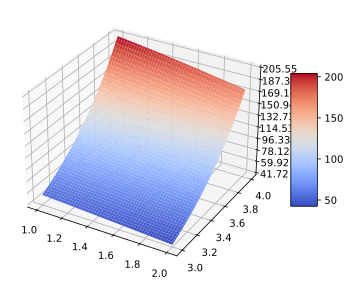

In [38]:
def f(x, y):
    return (y**3*np.exp(y))/(x**2+y**2
                             
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
xmin, xmax = 1, 2
ymin, ymax = 3, 4
X = np.linspace(xmin, xmax, 100)
Y = np.linspace(ymin, ymax, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [60]:
def MCintegral2D(style: str, N: int, xmin, xmax, ymin, ymax, zmax, zmin=0):
    '''
    Args:
    Return:
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    yrand = np.random.uniform(ymin, ymax, N)
    zrand = np.random.uniform(zmin, zmax, N)
    
    if style == 'HM':
        hit = 0
        for n in range(N):
            if zrand[n] < f(xrand[n], yrand[n]):
                hit += 1
        int_final = (hit/N)*(zmax-zmin)*(ymax-ymin)*(xmax-xmin)
    
        return int_final
        
    if style == 'SM':
        fmean = 0
        for n in range(N):
            fmean += f(xrand[n], yrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)
        
        return int_final
    
    if style == 'SP': #special
        fmean = 0
        for n in range(N):
            if (xrand[n] - 0.5)**2 + yrand[n]**2 < 1:
                fmean += f(xrand[n], yrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)
        
        return int_final

In [63]:
int2d_hm = MCintegral2D(style='HM', N=10000, xmin=1, xmax=2, ymin=3, ymax=4, zmax=210)
int2d_sm = MCintegral2D(style='SM', N=10000, xmin=1, xmax=2, ymin=3, ymax=4, zmax=210)
int2d_sp = MCintegral2D(style='SP', N=10000, xmin=-3, xmax=3, ymin=-3, ymax=3, zmax=210)

int2d_hm, int2d_sm, int2d_sp

(104.139, 104.43036428001251, 0.5150002859147584)

## Problem 1.5. Higher dimensional integrals (3D)

In [72]:
def MCintegral3D(style: str, N: int, xmin, xmax, ymin, ymax, zmin, zmax):
    '''
    Args
    Returns
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    yrand = np.random.uniform(ymin, ymax, N)
    zrand = np.random.uniform(zmin, zmax, N)
    
    if style == 'SM':
        fmean = 0
        for n in range(N):
            fmean += f(xrand[n], yrand[n], zrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)*(zmax-zmin)
        
        return int_final
    
    if style == 'SP':
        fmean = 0
        for n in range(N):
            if (xrand[n]**2+yrand[n]**2 <= 1) and (-1 <= zrand[n] <= 1):
                fmean += f(xrand[n], yrand[n], zrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)*(zmax-zmin)
        
        return int_final

In [74]:
def f(x, y, z):
    return 1/np.sqrt(x**2+y**2+(z-2)**2)

int3d_sm = MCintegral3D('SM', 10000, -1, 1, -1.5, 1.5, -1, 1)
int3d_sp = MCintegral3D('SP', 10000, -1, 1, -1.5, 1.5, -1, 1)

int3d_sm, int3d_sp

(5.632837929094661, 3.141229510074631)